In [1]:
import matplotlib.pyplot as plt
import json
import os
from glob import glob
import pandas as pd
import seaborn as sns

In [2]:
data_size_list = ['500K', '1M', '2M', '4M', '9M', '20M']

In [3]:
def get_vis_data(result_path, is_without, field):
    vis_data = {
        'lib': [],
        'time': [],
        'data_size': []
    }
    for lib in ['polars', 'pandas']:
        for data_size in data_size_list:
            path = os.path.join(result_path, f'CSV_{data_size}_PATH_{is_without}_read.json')
            with open(path, 'r') as file:
                data = json.load(file)[field]
                vis_data['lib'].append(lib)
                vis_data['time'].append(data[lib])
                vis_data['data_size'].append(data_size)
    return pd.DataFrame(vis_data)

# 1. Compare read_csv speed

       lib        time data_size
0   polars    0.113517      500K
1   polars    0.263692        1M
2   polars    0.465516        2M
3   polars    0.865607        4M
4   polars    2.116297        9M
5   polars    5.393337       20M
6   pandas    2.418448      500K
7   pandas    4.710112        1M
8   pandas    9.838640        2M
9   pandas   22.760440        4M
10  pandas   44.420781        9M
11  pandas  176.523981       20M


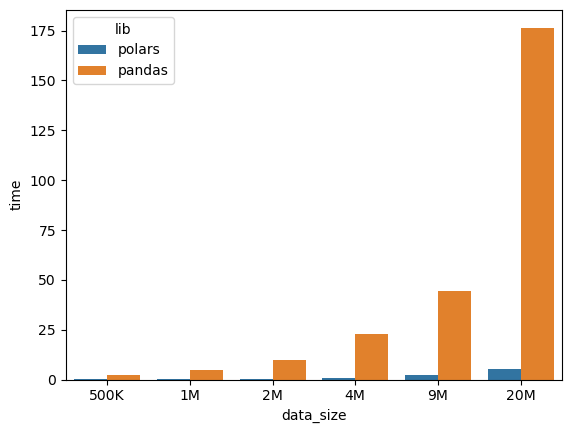

In [4]:
speed_results = get_vis_data('.', 'without', 'read_csv')
print(speed_results)

sns.barplot(speed_results, x='data_size', y='time', hue='lib')
plt.show()

# 2. Compare filter_one_condition speed

       lib      time data_size
0   polars  0.114515      500K
1   polars  0.213536        1M
2   polars  0.439905        2M
3   polars  0.915216        4M
4   polars  2.122823        9M
5   polars  5.363633       20M
6   pandas  0.174709      500K
7   pandas  0.321433        1M
8   pandas  0.564815        2M
9   pandas  1.982293        4M
10  pandas  2.940408        9M
11  pandas  9.572142       20M


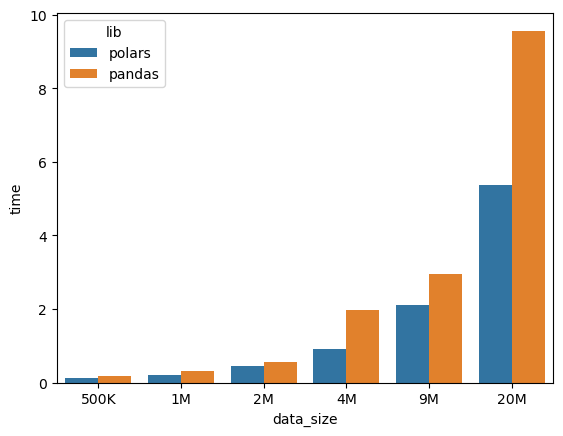

In [5]:
speed_results = get_vis_data('.', 'without', 'filter_one_condition')
print(speed_results)

sns.barplot(speed_results, x='data_size', y='time', hue='lib')
plt.show()

In [6]:
# speed_results = get_vis_data('.', 'with', 'filter_one_condition')
# print(speed_results)

# sns.barplot(speed_results, x='data_size', y='time', hue='lib')
# plt.show()

# 3. Compare filter_multiple_conditions speed

       lib      time data_size
0   polars  0.061698      500K
1   polars  0.118760        1M
2   polars  0.220636        2M
3   polars  0.412161        4M
4   polars  0.871652        9M
5   polars  2.627394       20M
6   pandas  0.026143      500K
7   pandas  0.067103        1M
8   pandas  0.125451        2M
9   pandas  0.239199        4M
10  pandas  0.491454        9M
11  pandas  1.195431       20M


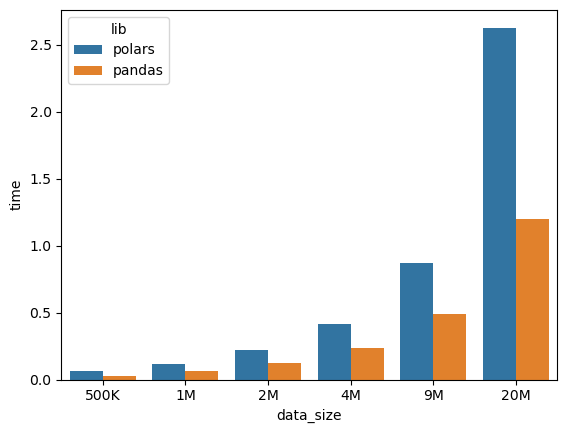

In [7]:
speed_results = get_vis_data('.', 'without', 'filter_multiple_conditions')
print(speed_results)

sns.barplot(speed_results, x='data_size', y='time', hue='lib')
plt.show()

In [8]:
# speed_results = get_vis_data('.', 'with', 'filter_multiple_conditions')
# print(speed_results)

# sns.barplot(speed_results, x='data_size', y='time', hue='lib')
# plt.show()

# 4. Compare create_new_column speed

       lib      time data_size
0   polars  0.114879      500K
1   polars  0.287324        1M
2   polars  0.484157        2M
3   polars  0.902215        4M
4   polars  2.015439        9M
5   polars  4.907775       20M
6   pandas  0.133920      500K
7   pandas  0.255497        1M
8   pandas  0.542761        2M
9   pandas  1.080274        4M
10  pandas  2.858585        9M
11  pandas  6.055403       20M


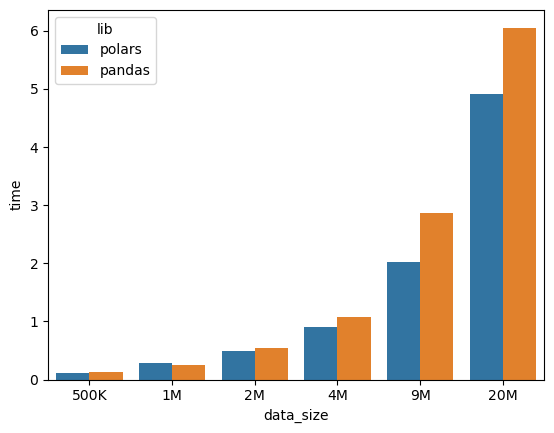

In [9]:
speed_results = get_vis_data('.', 'without', 'create_new_column')
print(speed_results)

sns.barplot(speed_results, x='data_size', y='time', hue='lib')
plt.show()

In [10]:
# speed_results = get_vis_data('.', 'with', 'create_new_column')
# print(speed_results)

# sns.barplot(speed_results, x='data_size', y='time', hue='lib')
# plt.show()

# 5. Compare group_by speed

       lib       time data_size
0   polars   0.049100      500K
1   polars   0.085523        1M
2   polars   0.142056        2M
3   polars   0.249203        4M
4   polars   0.557714        9M
5   polars   1.304322       20M
6   pandas   1.227515      500K
7   pandas   2.888680        1M
8   pandas   5.194696        2M
9   pandas  11.619450        4M
10  pandas  24.124026        9M
11  pandas  75.351639       20M


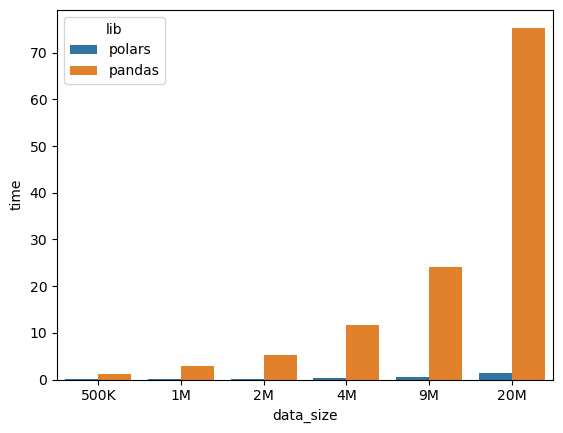

In [11]:
speed_results = get_vis_data('.', 'without', 'group_by')
print(speed_results)

sns.barplot(speed_results, x='data_size', y='time', hue='lib')
plt.show()

In [12]:
# speed_results = get_vis_data('.', 'with', 'group_by')
# print(speed_results)

# sns.barplot(speed_results, x='data_size', y='time', hue='lib')
# plt.show()